In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as ptl
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [4]:
df = pd.read_csv('who.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Podemos observar que la Columna bmi tiene algunos valores nulos

In [8]:
pd.isnull(df['bmi']).sum()

201

In [7]:
#Estoy llenando las columnas con valor null con el promedio de valores de la columna
df['bmi'].fillna(df['bmi'].mean())

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

### Cleaning Not Null Values

In [9]:
# Variable genero puede tener alguna informacion basura.
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [10]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [11]:
#Todos los id son unicos 
len(df['id'].unique())

5110

In [12]:
# Validar que la edad de las personas sea mayor que 1 y menor a 100
df[(df['age'] > 100) | (df['age'] < 1)]

df[df.age < 1]

for indice in df.index:
    if df.loc[indice].age < 1:
        df.loc[indice].age *= 100 
        

/tmp/ipykernel_1638607/1027720159.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[indice].age *= 100


In [17]:
df.iloc[4910]


id                      37622
gender                 Female
age                      0.32
hypertension                0
heart_disease               0
ever_married               No
work_type            children
Residence_type          Urban
avg_glucose_level      108.63
bmi                      19.6
smoking_status        Unknown
stroke                      0
Name: 4910, dtype: object

In [26]:
edades = df['age']

In [28]:
edades[edades < 0]

Series([], Name: age, dtype: float64)

In [13]:
#query : df[(df['age'] > 100) | (df['age'] < 1)]['age'] * 100
df[(df['age'] > 100) | (df['age'] < 1)]['age'] * 100


363     64.0
376     88.0
564     32.0
982     88.0
996     24.0
1093    32.0
1206    72.0
1317    80.0
1600    40.0
1614     8.0
1808    64.0
1975    56.0
1999    24.0
2008    56.0
2012    64.0
2030    48.0
2358    88.0
2481    88.0
2490    88.0
2579    32.0
2630    80.0
2801    80.0
2875    64.0
2898    24.0
3251    56.0
3295     8.0
3392    24.0
3440    56.0
3618    16.0
3626    80.0
3859    32.0
3894    56.0
3968    16.0
4007    72.0
4021    16.0
4053    48.0
4293    24.0
4409    72.0
4581    40.0
4645    48.0
4910    32.0
4929    72.0
5089    72.0
Name: age, dtype: float64

In [45]:
df.iloc[4910]


id                      37622
gender                 Female
age                      0.32
hypertension                0
heart_disease               0
ever_married               No
work_type            children
Residence_type          Urban
avg_glucose_level      108.63
bmi                      19.6
smoking_status        Unknown
stroke                      0
Name: 4910, dtype: object

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


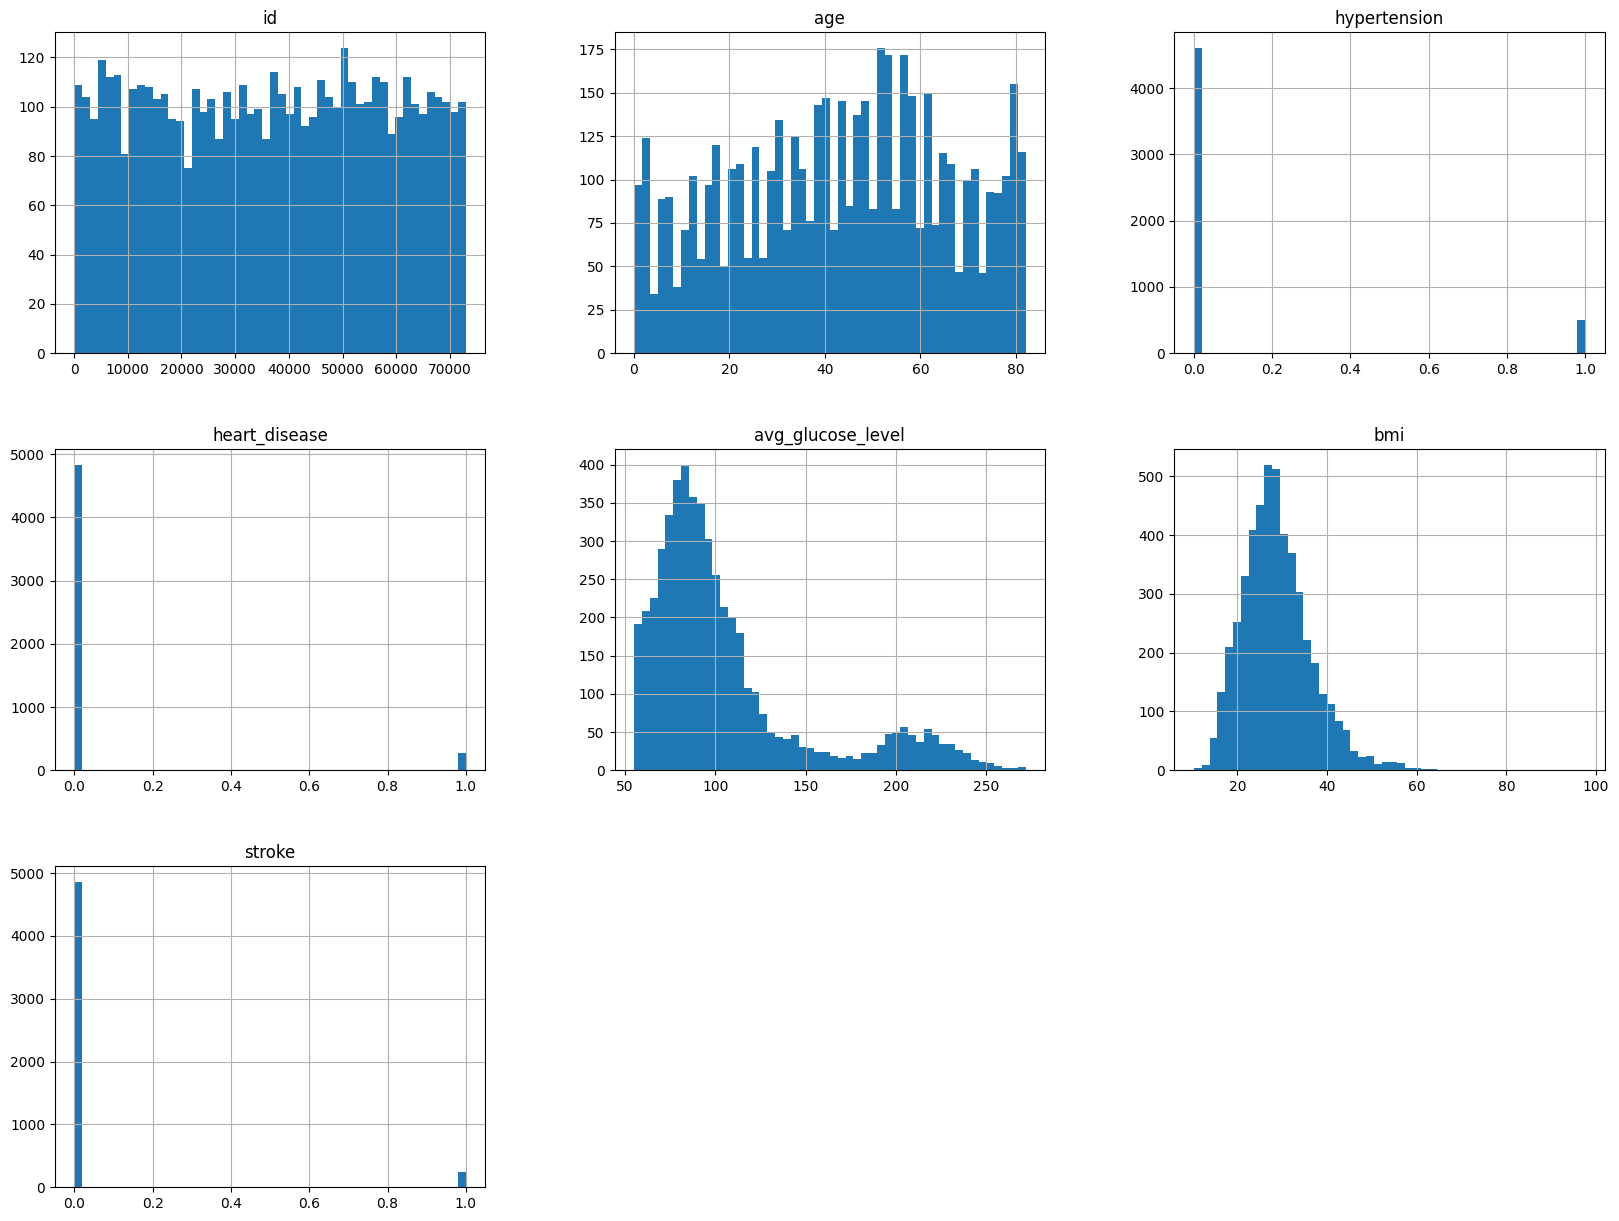

In [6]:
df.hist(bins=50, figsize=(20,15))
ptl.show()

## Creando Test set

In [15]:
train_set,test_set = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
test_set.value_counts()

id     gender  age    hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
84     Male    55.00  0             0              Yes           Private        Urban           89.17              31.5  never smoked     0         0.000978
49901  Male    55.00  0             0              Yes           Govt_job       Urban           154.03             31.6  smokes           0         0.000978
49928  Female  59.00  0             0              Yes           Govt_job       Rural           111.99             35.5  formerly smoked  0         0.000978
49970  Male    1.72   0             0              No            children       Rural           127.29             18.5  Unknown          0         0.000978
50009  Female  17.00  0             0              No            Private        Urban           81.51              19.5  formerly smoked  0         0.000978
                                                                      

## Training set Copy

In [21]:
training_data = train_set.copy()

<AxesSubplot: xlabel='stroke', ylabel='hypertension'>

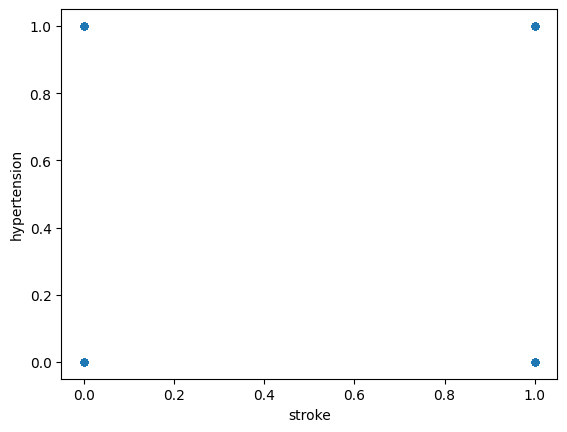

In [22]:
training_data.plot(kind="scatter",x = "stroke", y = "hypertension")

<AxesSubplot: xlabel='stroke', ylabel='avg_glucose_level'>

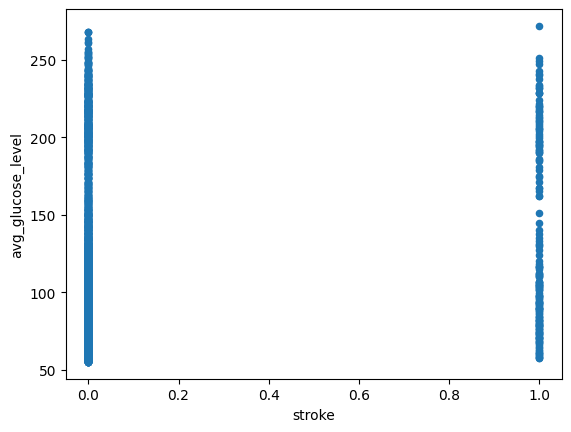

In [24]:
training_data.plot(kind="scatter",x = "stroke", y = "avg_glucose_level")

<AxesSubplot: ylabel='Frequency'>

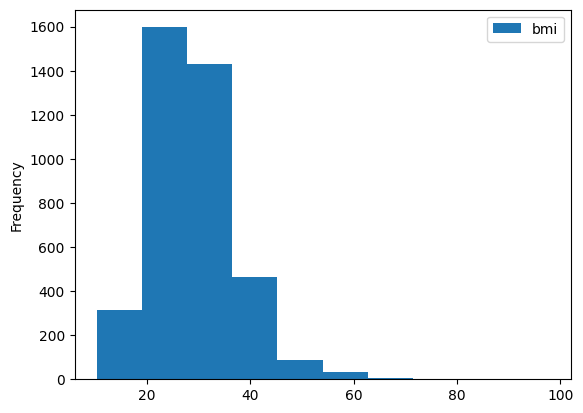

In [87]:
training_data.plot(kind="hist",x = "stroke", y = "bmi")

In [86]:
# Buscando correlaciones entre los atributos
corr_matrix = training_data.corr()

/tmp/ipykernel_72453/4205492362.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = training_data.corr()


In [1]:
corr_matrix["stroke"]

NameError: name 'corr_matrix' is not defined

array([[<AxesSubplot: xlabel='hypertension', ylabel='hypertension'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='hypertension'>,
        <AxesSubplot: xlabel='bmi', ylabel='hypertension'>,
        <AxesSubplot: xlabel='stroke', ylabel='hypertension'>,
        <AxesSubplot: xlabel='age', ylabel='hypertension'>],
       [<AxesSubplot: xlabel='hypertension', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='bmi', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='stroke', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='age', ylabel='heart_disease'>],
       [<AxesSubplot: xlabel='hypertension', ylabel='avg_glucose_level'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='avg_glucose_level'>,
        <AxesSubplot: xlabel='avg_glucose_level', y

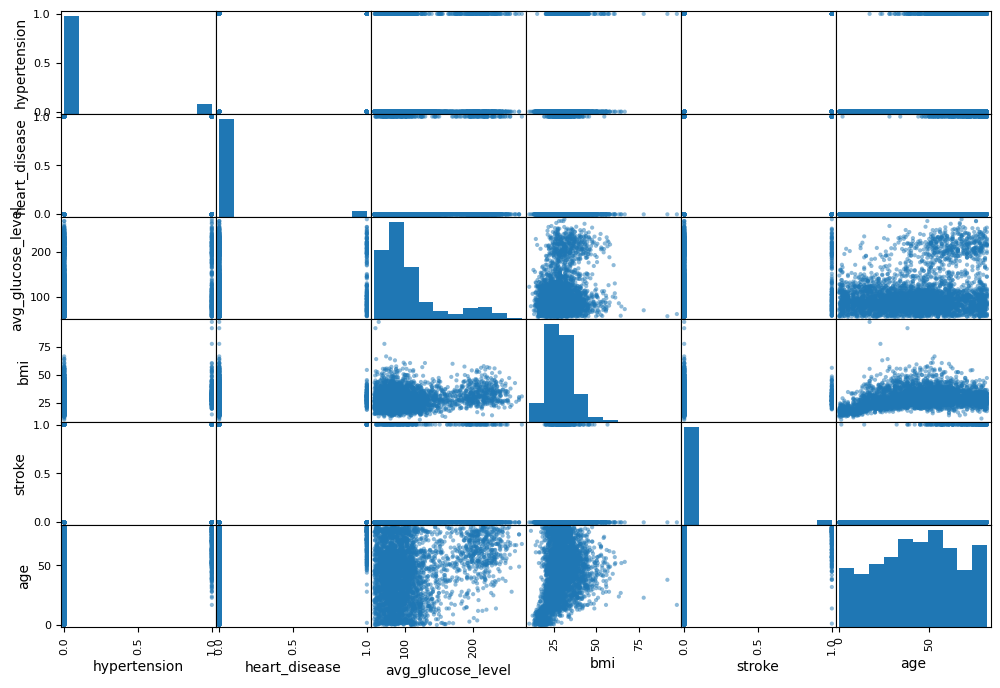

In [83]:
attributes = ["hypertension","heart_disease","avg_glucose_level","bmi","stroke","age"]

scatter_matrix(training_data[attributes], figsize=(12, 8))

<AxesSubplot: xlabel='stroke', ylabel='age'>

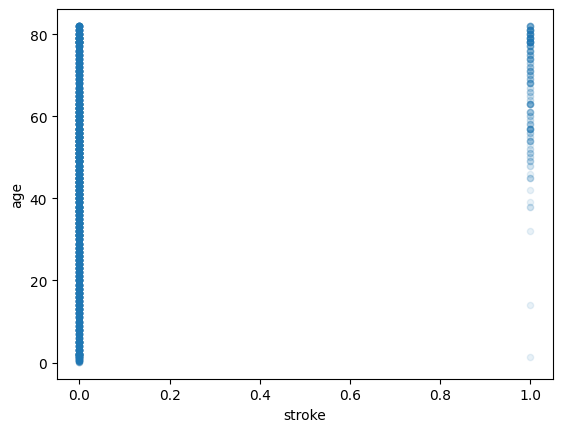

In [84]:
training_data.plot(kind="scatter", x="stroke", y="age",
alpha=0.1)